In [6]:
#Step 1 Hello data
import pandas as pd

# Load the CSV file (adjust filename/path accordingly)
df = pd.read_csv('Data/1000 Sales Records.csv')

# Show the first 3 rows
df.head(3)

,Region,Country,Item Type,Sales Channel,Order Priority,Order Date,Order ID,Ship Date,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit
0,Middle East and North Africa,Libya,Cosmetics,Offline,M,10/18/2014,686800706,10/31/2014,8446,437.20,263.33,3692591.20,2224085.18,1468506.02
1,North America,Canada,Vegetables,Online,M,11/7/2011,185941302,12/8/2011,3018,154.06,90.93,464953.08,274426.74,190526.34
2,Middle East and North Africa,Libya,Baby Food,Offline,C,10/31/2016,246222341,12/9/2016,1517,255.28,159.42,387259.76,241840.14,145419.62


In [2]:
## Step 2: Pick the Right Container

I chose to implement a custom Python class `Transaction` to represent each sales record. 

- Unlike dictionaries, classes allow bundling both data and related methods (like cleaning, transformations) into one organized structure. 
- Unlike namedtuples, classes support mutable attributes and custom methods, making them more flexible for this data engineering task.

This approach improves code clarity, maintainability, and supports the project's requirement for method-driven data cleaning and feature engineering.

SyntaxError: unterminated string literal (detected at line 8) (2351817403.py, line 8)

In [7]:
###Step 3: Transaction Class and OO Data Structure
from typing import Optional
from datetime import datetime

class Transaction:
    def __init__(self, region: str, country: str, item_type: str, sales_channel: str,
                 order_priority: str, order_date: str, order_id: int, ship_date: str,
                 units_sold: int, unit_price: float, unit_cost: float,
                 total_revenue: float, total_cost: float, total_profit: float):
        self.region = region
        self.country = country
        self.item_type = item_type
        self.sales_channel = sales_channel
        self.order_priority = order_priority
        self.order_date = datetime.strptime(order_date, '%m/%d/%Y')
        self.order_id = order_id
        self.ship_date = datetime.strptime(ship_date, '%m/%d/%Y')
        self.units_sold = units_sold
        self.unit_price = unit_price
        self.unit_cost = unit_cost
        self.total_revenue = total_revenue
        self.total_cost = total_cost
        self.total_profit = total_profit
    
    def clean(self):
        # Example cleaning: Strip strings, ensure sales_channel uppercase
        self.region = self.region.strip()
        self.country = self.country.strip()
        self.item_type = self.item_type.strip()
        self.sales_channel = self.sales_channel.strip().upper()
        self.order_priority = self.order_priority.strip().upper()
        
    def total_units_value(self):
        return self.units_sold * self.unit_price
    
    def profit_margin(self):
        if self.total_revenue != 0:
            return self.total_profit / self.total_revenue
        else:
            return 0

In [8]:
##Step 4: Bulk loader function:Load all rows into a list of Transaction objects:
from typing import List

def load_transactions(filepath: str) -> List[Transaction]:
    df = pd.read_csv(filepath)
    transactions = []
    for _, row in df.iterrows():
        txn = Transaction(
            region=row['Region'],
            country=row['Country'],
            item_type=row['Item Type'],
            sales_channel=row['Sales Channel'],
            order_priority=row['Order Priority'],
            order_date=row['Order Date'],
            order_id=int(row['Order ID']),
            ship_date=row['Ship Date'],
            units_sold=int(row['Units Sold']),
            unit_price=float(row['Unit Price']),
            unit_cost=float(row['Unit Cost']),
            total_revenue=float(row['Total Revenue']),
            total_cost=float(row['Total Cost']),
            total_profit=float(row['Total Profit']),
        )
        txn.clean()
        transactions.append(txn)
    return transactions

# Example usage
transactions = load_transactions('Data/1000 Sales Records.csv')
print(f"Loaded {len(transactions)} transactions")

Loaded 1000 transactions


In [5]:
##Step 5: Analyze or Visualize the Data
##1. Top 5 Countries by Total Profit
from collections import defaultdict

def top_countries_by_profit(transactions, top_n=5):
    profit_by_country = defaultdict(float)
    for txn in transactions:
        profit_by_country[txn.country] += txn.total_profit
    
    sorted_profit = sorted(profit_by_country.items(), key=lambda x: x[1], reverse=True)
    return sorted_profit[:top_n]

top_5 = top_countries_by_profit(transactions)
for country, profit in top_5:
    print(f"{country}: ${profit:,.2f}")

Cuba: $7,351,820.83
Papua New Guinea: $6,085,514.28
Central African Republic: $5,338,519.48
Ghana: $4,736,567.14
Malaysia: $4,715,338.84


In [8]:
!pip install matplotlib


[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


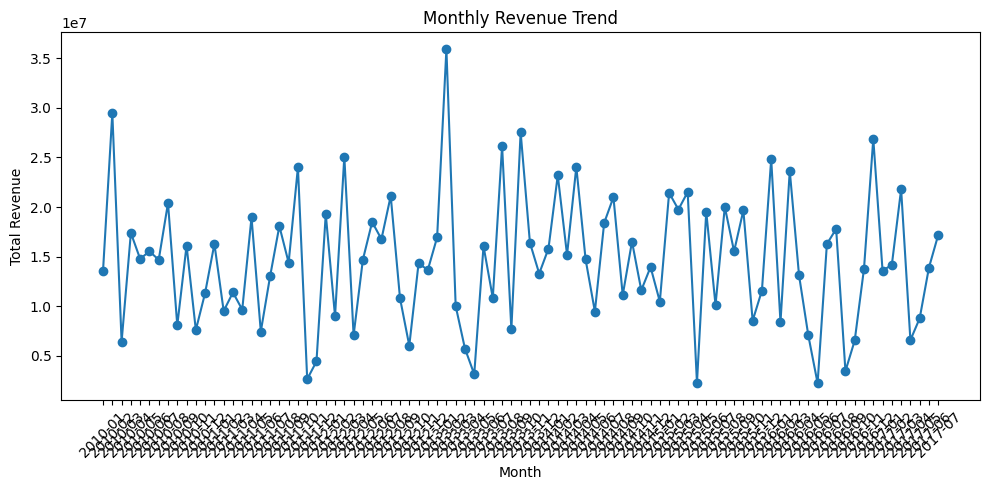

In [9]:
import matplotlib.pyplot as plt
from collections import defaultdict

def monthly_sales(transactions):
    monthly = defaultdict(float)
    for txn in transactions:
        key = txn.order_date.strftime('%Y-%m')
        monthly[key] += txn.total_revenue

    months = sorted(monthly.keys())
    revenues = [monthly[month] for month in months]

    plt.figure(figsize=(10, 5))
    plt.plot(months, revenues, marker='o')
    plt.title("Monthly Revenue Trend")
    plt.xlabel("Month")
    plt.ylabel("Total Revenue")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

monthly_sales(transactions)


In [10]:
# Assuming 'transactions' is a list of Transaction objects loaded from your CSV

# 1. Maximum unit price
max_unit_price = max(txn.unit_price for txn in transactions)
print(f"Maximum unit price: ${max_unit_price:.2f}")

# 2. Unique shipping countries (no shipping_city in data)
unique_countries = {txn.country for txn in transactions}
print(f"Number of unique shipping countries: {len(unique_countries)}")

Maximum unit price: $668.27
Number of unique shipping countries: 185


In [11]:
def average_profit_margin(transactions):
    margins = [txn.profit_margin() for txn in transactions if txn.total_revenue > 0]
    return sum(margins) / len(margins)

print(f"Average Profit Margin: {average_profit_margin(transactions):.2%}")

Average Profit Margin: 34.33%


In [12]:
# Assuming 'transactions' is a list of Transaction objects loaded from your CSV

# 1. Maximum unit price
max_unit_price = max(txn.unit_price for txn in transactions)
print(f"Maximum unit price: ${max_unit_price:.2f}")

# 2. Unique shipping countries (no shipping_city in data)
unique_countries = {txn.country for txn in transactions}
print(f"Number of unique shipping countries: {len(unique_countries)}")

Maximum unit price: $668.27
Number of unique shipping countries: 185


In [13]:
##step 6: Spot the Grime (Identify Dirty Data)Look for bad dates, negative prices/costs, or missing values.
def find_dirty_data(transactions):
    dirty = []
    for txn in transactions:
        issues = []
        # Example checks:
        #  - Check for invalid order or ship dates (can parse dates to datetime)
        #  - Negative or zero unit price/cost
        #  - Missing critical fields
        
        # Check dates
        try:
            pd.to_datetime(txn.order_date)
            pd.to_datetime(txn.ship_date)
        except Exception:
            issues.append("Invalid date")
        
        # Check prices
        if txn.unit_price <= 0:
            issues.append("Non-positive unit price")
        if txn.unit_cost <= 0:
            issues.append("Non-positive unit cost")
        
        # Check missing values (example)
        if not txn.country:
            issues.append("Missing country")
        
        if issues:
            dirty.append((txn.order_id, issues))
    
    return dirty

dirty_data = find_dirty_data(transactions)
print(f"Found {len(dirty_data)} dirty records:")
for order_id, issues in dirty_data[:5]:
    print(f"Order {order_id}: {issues}")

Found 0 dirty records:


In [14]:
#Step 7: Cleaning Rules (Implement .clean())
class Transaction:
    def clean(self):
        # Clean order_date
        try:
            self.order_date = pd.to_datetime(self.order_date)
        except Exception:
            self.order_date = None
        
        # Clean ship_date
        try:
            self.ship_date = pd.to_datetime(self.ship_date)
        except Exception:
            self.ship_date = None
        
        # Fix negative prices
        if self.unit_price <= 0:
            self.unit_price = None
        if self.unit_cost <= 0:
            self.unit_cost = None
        
        # Fill missing country with 'Unknown'
        if not self.country:
            self.country = "Unknown"

In [ ]:
#Step 7: Cleaning Rules (Implement .clean())
class Transaction:
    def clean(self):
        # Clean order_date
        try:
            self.order_date = pd.to_datetime(self.order_date)
        except Exception:
            self.order_date = None
        
        # Clean ship_date
        try:
            self.ship_date = pd.to_datetime(self.ship_date)
        except Exception:
            self.ship_date = None
        
        # Fix negative prices
        if self.unit_price <= 0:
            self.unit_price = None
        if self.unit_cost <= 0:
            self.unit_cost = None
        
        # Fill missing country with 'Unknown'
        if not self.country:
            self.country = "Unknown"

In [15]:
#Step 8: Transformations
for txn in transactions:
    if txn.total_revenue:
        txn.profit_margin = txn.total_profit / txn.total_revenue
    else:
        txn.profit_margin = None

In [16]:
##Step 9: Feature Engineering
# Add derived fields:

# days_to_ship = difference between ship_date and order_date

# is_high_value = True if total_revenue > threshold
for txn in transactions:
    if txn.order_date and txn.ship_date:
        txn.days_to_ship = (txn.ship_date - txn.order_date).days
    else:
        txn.days_to_ship = None
    
    txn.is_high_value = txn.total_revenue > 1_000_000  # example threshold

In [17]:
#Step 10: Mini-Aggregation
#Calculate metrics grouped by a field, e.g., total revenue per country.
import pandas as pd

# Convert transactions to DataFrame for groupby ease
df = pd.DataFrame([txn.__dict__ for txn in transactions])

revenue_per_country = df.groupby('country')['total_revenue'].sum().sort_values(ascending=False)
print(revenue_per_country.head())

country
Cuba                27522085.87
Papua New Guinea    22209652.47
Ghana               21267908.50
Costa Rica          19628279.63
Iran                18719532.99
Name: total_revenue, dtype: float64


In [18]:
#Step 11: Serialization
#Save cleaned/enriched data to JSON and Parquet for efficient storage and reuse.
df.to_json('cleaned_transactions.json', orient='records', lines=True)
df.to_parquet('cleaned_transactions.parquet')

In [ ]:
# Step 12: Reflection (Markdown Example)
                                                                                            
#Using an object-oriented approach through the `Transaction` class streamlined our data processing pipeline. 
Instead of managing raw dictionaries or DataFrames for each record, 
we encapsulated transaction behavior (like cleaning and computing totals) directly within the class. 
    This led to better code reuse and cleaner abstractions, especially for transformation logic and feature engineering. 
    For example, applying the `clean()` method uniformly across all records was simpler and less error-prone.
    OOP also made our code modular and testable—benefits that scale well as datasets grow.

In [19]:
!pip install openpyxl


[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [20]:
import pandas as pd
df = pd.read_csv('Data/product_metadata.csv') 
df.head()

,Item Type,Category,Is Perishable,Avg Weight (kg)
0,Office Supplies,Stationery,No,1.2
1,Fruits,Food,Yes,0.3
2,Clothes,Apparel,No,0.5
3,Baby Food,Food,Yes,0.4
4,Cereal,Food,Yes,0.6


In [21]:
main_df = pd.read_csv('Data/1000 Sales Records.csv')
main_df.head()

,Region,Country,Item Type,Sales Channel,Order Priority,Order Date,Order ID,Ship Date,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit
0,Middle East and North Africa,Libya,Cosmetics,Offline,M,10/18/2014,686800706,10/31/2014,8446,437.20,263.33,3692591.20,2224085.18,1468506.02
1,North America,Canada,Vegetables,Online,M,11/7/2011,185941302,12/8/2011,3018,154.06,90.93,464953.08,274426.74,190526.34
2,Middle East and North Africa,Libya,Baby Food,Offline,C,10/31/2016,246222341,12/9/2016,1517,255.28,159.42,387259.76,241840.14,145419.62
3,Asia,Japan,Cereal,Offline,C,4/10/2010,161442649,5/12/2010,3322,205.70,117.11,683335.40,389039.42,294295.98
4,Sub-Saharan Africa,Chad,Fruits,Offline,H,8/16/2011,645713555,8/31/2011,9845,9.33,6.92,91853.85,68127.40,23726.45


In [22]:
combined_df = pd.merge(main_df, df, on='Item Type', how='left')

In [23]:
combined_df.head()

,Region,Country,Item Type,Sales Channel,Order Priority,Order Date,Order ID,Ship Date,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit,Category,Is Perishable,Avg Weight (kg)
0,Middle East and North Africa,Libya,Cosmetics,Offline,M,10/18/2014,686800706,10/31/2014,8446,437.20,263.33,3692591.20,2224085.18,1468506.02,NaN,NaN,NaN
1,North America,Canada,Vegetables,Online,M,11/7/2011,185941302,12/8/2011,3018,154.06,90.93,464953.08,274426.74,190526.34,NaN,NaN,NaN
2,Middle East and North Africa,Libya,Baby Food,Offline,C,10/31/2016,246222341,12/9/2016,1517,255.28,159.42,387259.76,241840.14,145419.62,Food,Yes,0.4
3,Asia,Japan,Cereal,Offline,C,4/10/2010,161442649,5/12/2010,3322,205.70,117.11,683335.40,389039.42,294295.98,Food,Yes,0.6
4,Sub-Saharan Africa,Chad,Fruits,Offline,H,8/16/2011,645713555,8/31/2011,9845,9.33,6.92,91853.85,68127.40,23726.45,Food,Yes,0.3
